In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
# load data
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## Question: Do this guy make it to the end of the world ?
this_guy = train.loc[23, ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
this_guy[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

PassengerId                              24
Pclass                                    1
Name           Sloper, Mr. William Thompson
Sex                                    male
Age                                    28.0
SibSp                                     0
Parch                                     0
Ticket                               113788
Fare                                   35.5
Cabin                                    A6
Embarked                                  S
Name: 23, dtype: object

# Cleansing data

In [4]:
## ไม่มีข้อมูล
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## drop columns: Columns we don't need
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train = train.drop(drop_columns, axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
# cleansing missing data
train = train.dropna()
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


# a short ETA

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64


(0.0, 1.0)

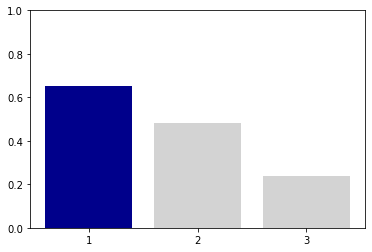

In [7]:
## Pclass vs Survived
print(train.groupby('Pclass')['Survived'].mean())
plt.bar(['1', '2', '3'], train.groupby('Pclass')['Survived'].mean(), color=['darkblue', 'lightgray', 'lightgray'])
plt.ylim(0, 1)

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64


(0.0, 1.0)

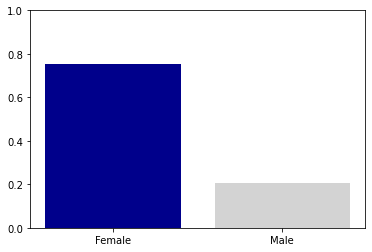

In [8]:
## Sex vs Survived
print(train.groupby('Sex')['Survived'].mean())
plt.bar(['Female', 'Male'], train.groupby('Sex')['Survived'].mean(), color=['darkblue', 'lightgray'])
plt.ylim(0, 1)

SibSp
0    0.368870
1    0.530055
2    0.440000
3    0.333333
4    0.166667
5    0.000000
Name: Survived, dtype: float64


(0.0, 1.0)

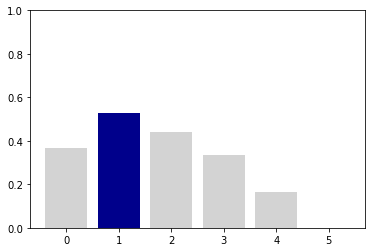

In [9]:
## SibSp vs Survived
print(train.groupby('SibSp')['Survived'].mean())
plt.bar(['0', '1', '2', '3', '4', '5'], train.groupby('SibSp')['Survived'].mean(), color=['lightgray', 'darkblue', 'lightgray', 'lightgray', 'lightgray'])
plt.ylim(0, 1)

Parch
0    0.354528
1    0.554545
2    0.573529
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


(0.0, 1.0)

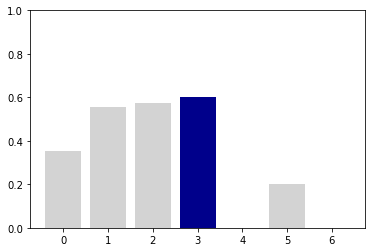

In [10]:
## Parch vs Survived
print(train.groupby('Parch')['Survived'].mean())
plt.bar(['0', '1', '2', '3', '4', '5', '6'], train.groupby('Parch')['Survived'].mean(), color=['lightgray', 'lightgray', 'lightgray', 'darkblue', 'lightgray'])
plt.ylim(0, 1)

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


(0.0, 1.0)

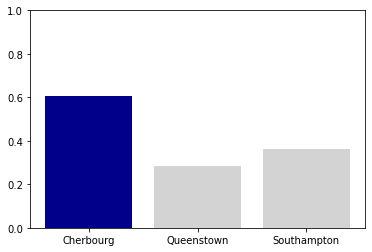

In [11]:
## Embarked vs Survived
print(train.groupby('Embarked')['Survived'].mean())
plt.bar(['Cherbourg', 'Queenstown', 'Southampton'], train.groupby('Embarked')['Survived'].mean(), color=['darkblue', 'lightgray', 'lightgray']) # C = Cherbourg; Q = Queenstown; S = Southampton)
plt.ylim(0, 1)

# Preprocessing data

In [12]:
# preprocesing
train['Sex'] = train['Sex'].map({'male':0, 'female':1}).astype(int)

train.loc[(train['Age']>=0) & (train['Age']<=18), 'Age'] = 0
train.loc[(train['Age']>18) & (train['Age']<=35), 'Age'] = 1
train.loc[(train['Age']>35) & (train['Age']<=60), 'Age'] = 2
train.loc[(train['Age']>60), 'Age'] = 3

train.loc[(train['Fare']>=0) & (train['Fare']<=8.05), 'Fare'] = 0
train.loc[(train['Fare']>8.05) & (train['Fare']<=16.00), 'Fare'] = 1
train.loc[(train['Fare']>16.00) & (train['Fare']<=40.63), 'Fare'] = 2
train.loc[(train['Fare']>40.63), 'Fare'] = 3

train.Embarked = train.Embarked.map({'S':0, 'C':1, 'Q':2}).astype(int)

<ipython-input-12-41e299526693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sex'] = train['Sex'].map({'male':0, 'female':1}).astype(int)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [13]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,2.0,1,0,3.0,1
2,1,3,1,1.0,0,0,0.0,0
3,1,1,1,1.0,1,0,3.0,0
4,0,3,0,1.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
885,0,3,1,2.0,0,5,2.0,2
886,0,2,0,1.0,0,0,1.0,0
887,1,1,1,1.0,0,0,2.0,0
889,1,1,0,1.0,0,0,2.0,1


# a short ETA (continue)

(0.0, 1.0)

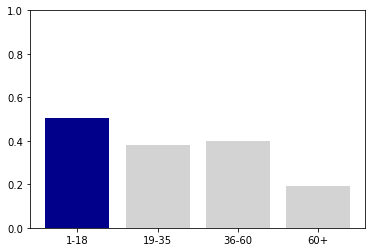

In [14]:
## Age vs Survived
train.groupby('Age')['Survived'].mean()
plt.bar(['1-18', '19-35', '36-60', '60+'], train.groupby('Age')['Survived'].mean(), color=['darkblue', 'lightgray', 'lightgray', 'lightgray']) 
plt.ylim(0, 1)

(0.0, 1.0)

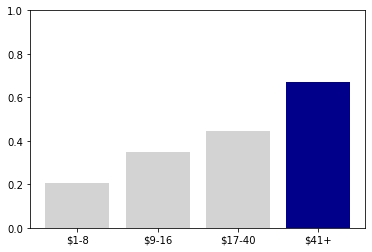

In [15]:
## Fare vs Survived
train.groupby('Fare')['Survived'].mean()
plt.bar(['$1-8', '$9-16', '$17-40', '$41+'], train.groupby('Fare')['Survived'].mean(), color=[ 'lightgray', 'lightgray', 'lightgray', 'darkblue']) 
plt.ylim(0, 1)

In [16]:
## dataset after cleansing & preprocessing
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,2.0,1,0,3.0,1
2,1,3,1,1.0,0,0,0.0,0
3,1,1,1,1.0,1,0,3.0,0
4,0,3,0,1.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
885,0,3,1,2.0,0,5,2.0,2
886,0,2,0,1.0,0,0,1.0,0
887,1,1,1,1.0,0,0,2.0,0
889,1,1,0,1.0,0,0,2.0,1


# Split Train & Test data

In [17]:
X_train = train.drop('Survived', axis=1)
y_train = train.Survived

In [18]:
# ## Train 80 : Test 20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train.Survived, test_size=0.1, random_state=123)

# Decision Tree

[Text(167.4, 190.26, 'X[1] <= 0.5\ngini = 0.478\nsamples = 640\nvalue = [387, 253]'),
 Text(83.7, 135.9, 'X[0] <= 1.5\ngini = 0.315\nsamples = 409\nvalue = [329, 80]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.473\nsamples = 94\nvalue = [58, 36]'),
 Text(20.925, 27.180000000000007, 'gini = 0.489\nsamples = 82\nvalue = [47, 35]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.24\nsamples = 315\nvalue = [271, 44]'),
 Text(104.625, 27.180000000000007, 'gini = 0.383\nsamples = 58\nvalue = [43, 15]'),
 Text(146.475, 27.180000000000007, 'gini = 0.2\nsamples = 257\nvalue = [228, 29]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 2.5\ngini = 0.376\nsamples = 231\nvalue = [58, 173]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 2.5\ngini = 0.122\nsamples = 138\nvalue = [9, 129]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.173\nsamples = 73\nvalue = [7, 66]'

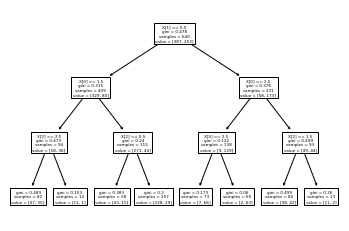

In [19]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth=3, random_state=123)
history = decision_tree.fit(X_train, y_train)

tree.plot_tree(history)

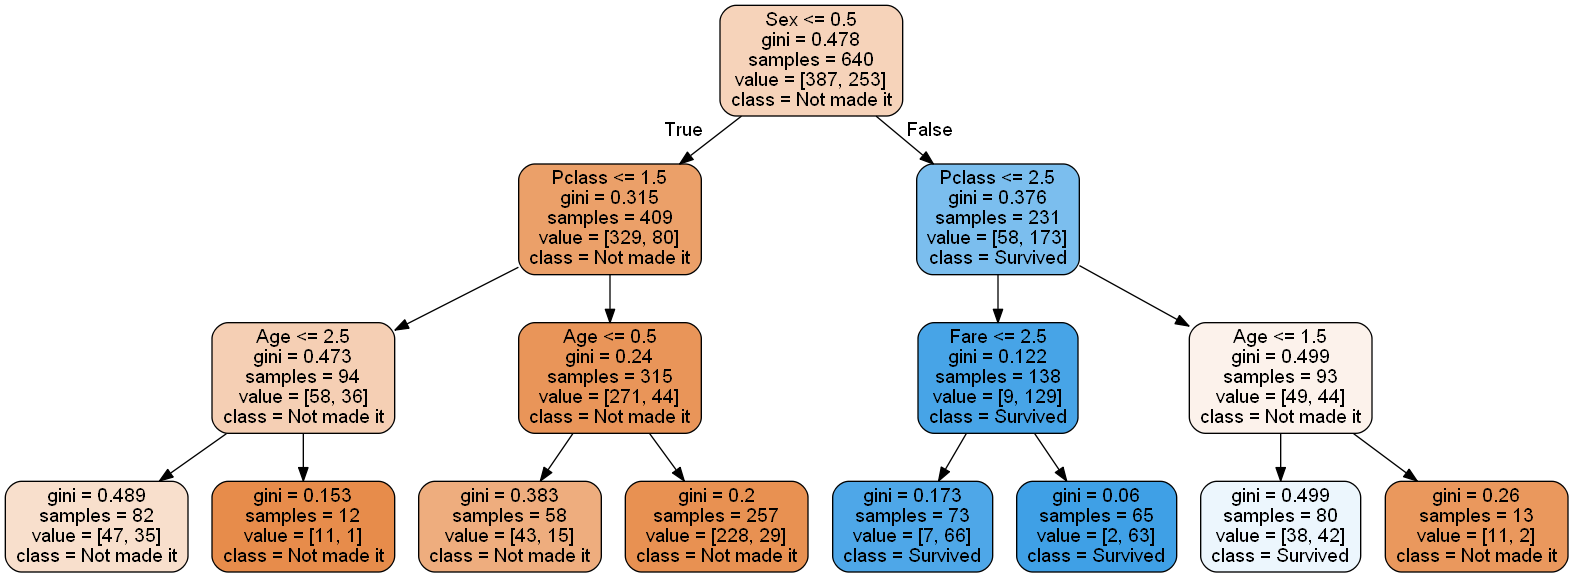

In [20]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

data_feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
survived = ['Not made it', 'Survived']

dot_data = export_graphviz(decision_tree, out_file=None,
                          feature_names=data_feature_names,
                          class_names=survived,
                          filled=True,
                          rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Prediction from Tree

In [21]:
## Model prediction
tree_pred = decision_tree.predict(X_test)
value, counts = np.unique(tree_pred, return_counts=True)

pd.DataFrame(counts, index=['Not made it', 'Survived'], columns=['People'])

,People
Not made it,46
Survived,26


# Evaluate

In [22]:
## Accuracy: ( TP + TN ) / ( TP + TN + FP + FN)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy = ", round(accuracy_score(y_test, tree_pred),4))

Accuracy =  0.7361


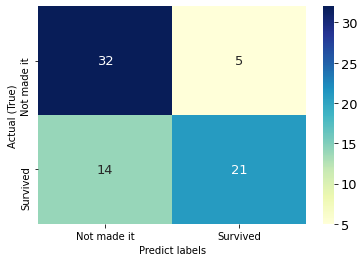

In [23]:
## Confusion Matrix
import seaborn as sns

cm = confusion_matrix(y_test, tree_pred)

ax = plt.subplot()
plt.rcParams.update({'font.size':13})

# color bar range between 0 and 0.5
sns.heatmap(cm, annot=True, ax=ax, cmap="YlGnBu")
ax.set_xlabel('Predict labels')
ax.set_ylabel('Actual (True)')
ax.xaxis.set_ticklabels(['Not made it', 'Survived'])
ax.yaxis.set_ticklabels(['Not made it', 'Survived'])
plt.show()

# Other Algorithm 

In [26]:
## Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
accuracy_score(y_test, svm_pred)

0.7361111111111112

In [27]:
## K-neightbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7777777777777778

In [28]:
## Random Forests
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=51, random_state=123)
randomForest.fit(X_train, y_train)
randomForest_pred = randomForest.predict(X_test)
accuracy_score(y_test, randomForest_pred)

0.7916666666666666

In [29]:
## Naive_bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
naive_pred = naive.predict(X_test)
accuracy_score(y_test, naive_pred)

0.7638888888888888

# Summary

In [30]:
summary = pd.DataFrame(index=['Decision Tree', 'Support Vector Machine', 'K-nearest Neighbors', 'Random Forest', 'Naive Bayes',],
            columns= ['Accuracy'])

In [31]:
summary.loc['Decision Tree', :] = (accuracy_score(y_test, tree_pred)*100).round(2)
summary.loc['Naive Bayes', :] = (accuracy_score(y_test, naive_pred)*100).round(2)
summary.loc['Support Vector Machine', :] = (accuracy_score(y_test, svm_pred)*100).round(2)
summary.loc['K-nearest Neighbors', :] = (accuracy_score(y_test, knn_pred)*100).round(2)
summary.loc['Random Forest', :] = (accuracy_score(y_test, randomForest_pred)*100).round(2)

summary

,Accuracy
Decision Tree,73.61
Support Vector Machine,73.61
K-nearest Neighbors,77.78
Random Forest,79.17
Naive Bayes,76.39


# Answer the Question: 

In [34]:
## Pclass=1, Sex=0, Age=1, SibSp=0, Parch=0, Fare=2, Embarked=2
result = decision_tree.predict(np.array([1, 0, 1, 0, 0, 2, 2]).reshape(1, -1))
survived = ['Not made it', 'Survived']
print('Model said this guy is {}, but Actually THIS GUY IS {} !!!!!!'.format(survived[int(result)], survived[this_guy['Survived']]))

Model said this guy is Not made it, but Actually THIS GUY IS Survived !!!!!!
